Alunos:

bfss@cesar.school - Bruno

fom@cesar.school - Fabio

mgrb@cesar.school - Marlos

rmbp@cesar.school - Renata

# Import do dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, single, average, fcluster

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2002/dados/mall_customers.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Gráficos preliminares

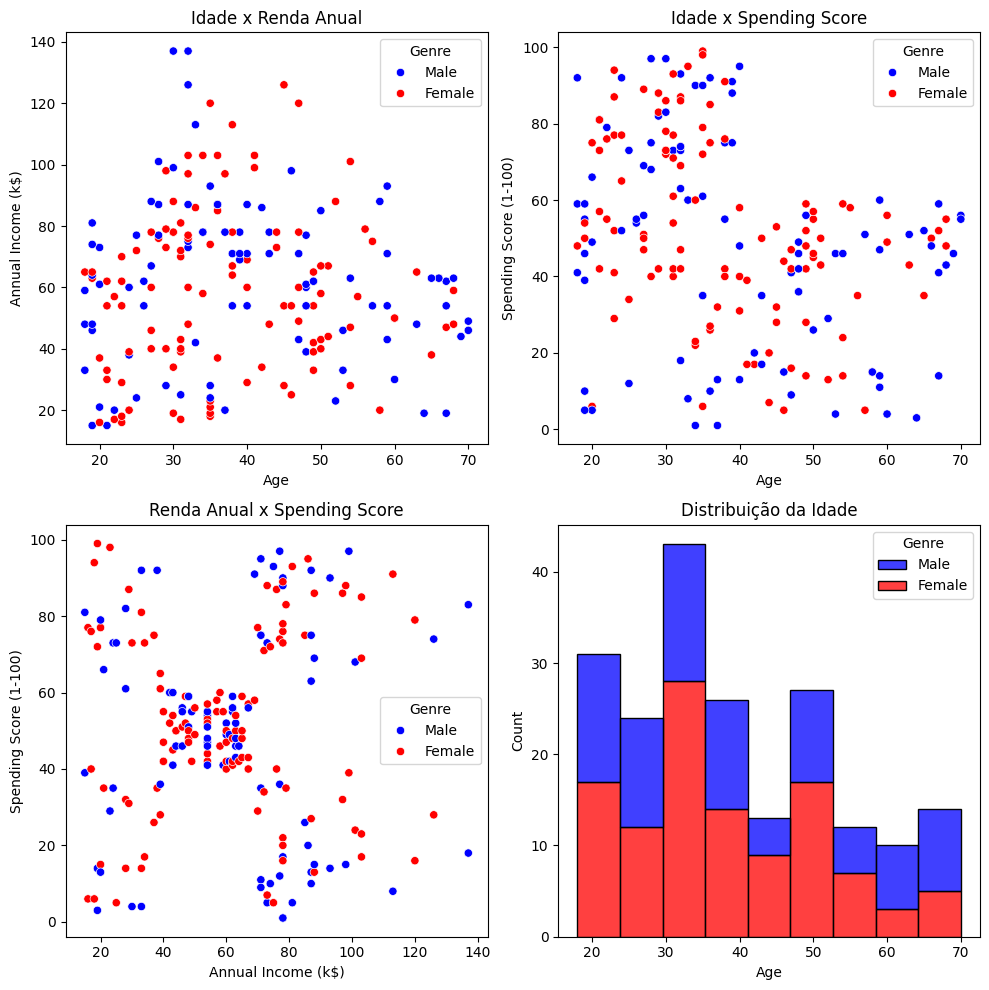

In [ ]:
# Criando a grade de subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Gráfico 1: Idade x Renda Anual
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Genre', palette={'Female': 'red', 'Male': 'blue'}, ax=axes[0, 0])
axes[0, 0].set_title('Idade x Renda Anual')

# Gráfico 2: Idade x Spending Score
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Genre', palette={'Female': 'red', 'Male': 'blue'}, ax=axes[0, 1])
axes[0, 1].set_title('Idade x Spending Score')

# Gráfico 3: Renda Anual x Spending Score
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', palette={'Female': 'red', 'Male': 'blue'}, ax=axes[1, 0])
axes[1, 0].set_title('Renda Anual x Spending Score')

# Gráfico 4: Distribuição da Idade
sns.histplot(data=df, x='Age', hue='Genre', multiple='stack', palette={'Female': 'red', 'Male': 'blue'}, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição da Idade')

# Ajustando os espaços entre os subplots
plt.tight_layout()

# Mostrando o gráfico
plt.show()

# Tratamento de dados

In [ ]:
df.rename(columns={'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'}, inplace=True)

In [ ]:
df['Genre'] = df['Genre'].map({'Male': 1, 'Female': 0})

In [ ]:
count = (df['Age']  < 20).sum()
print(count)

12


In [ ]:
# pegando uma amostra do dataframe, das idades menores que 25 anos
df = df[df['Age'] < 20]

# Gráfico

In [ ]:
df = df.set_index('CustomerID')

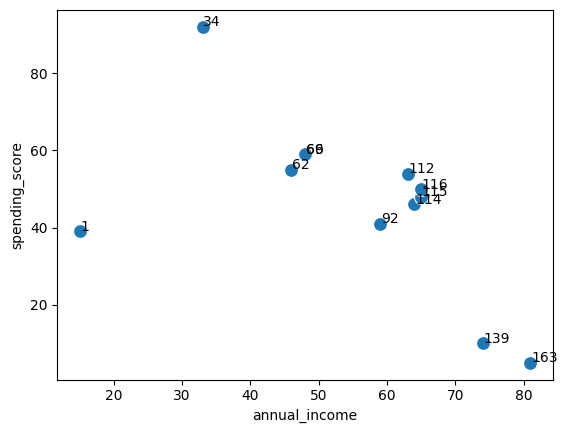

In [ ]:
ax = sns.scatterplot(x='annual_income', y='spending_score', s=100, data=df)

for i, txt in enumerate(df.index):
    ax.annotate(txt, (df.iloc[i].annual_income+0.1, df.iloc[i].spending_score+0.1))

#plt.legend(bbox_to_anchor=(1, 1))

plt.show()

# Clusterização

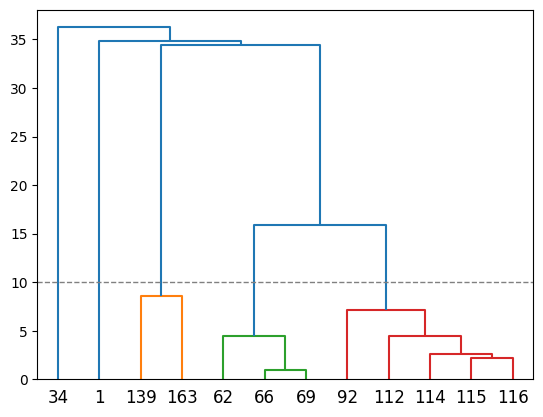

In [ ]:
# calcaulando a distância entre cada amostra
Z = single(df)
tr = 10
# Control number of clusters in the plot + add horizontal line.
dendrogram(Z, color_threshold=tr, labels=df.index)
plt.axhline(y=tr, c='grey', lw=1, linestyle='dashed')

# Show the graph
plt.show()

In [ ]:
labels = fcluster(Z, t=10, criterion='distance')

In [ ]:
df['cluster_id'] = labels

In [ ]:
df

,Genre,Age,annual_income,spending_score,cluster_id
CustomerID,,,,,
1,1,19,15,39,4
34,1,18,33,92,5
62,1,19,46,55,2
66,1,18,48,59,2
69,1,19,48,59,2
92,1,18,59,41,3
112,0,19,63,54,3
114,1,19,64,46,3
115,0,18,65,48,3


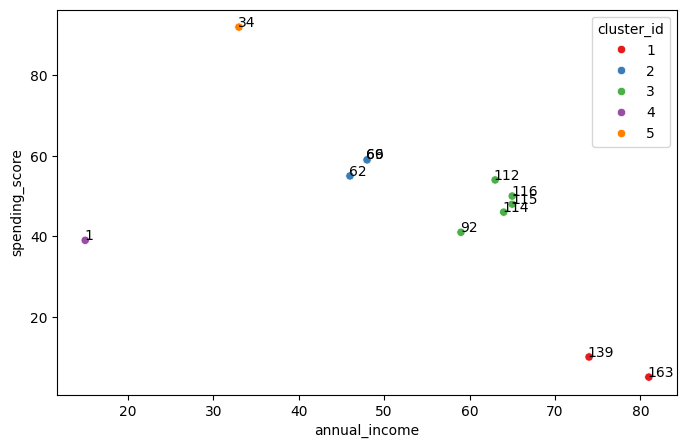

In [ ]:
plt.figure(figsize=(8, 5))

sns.scatterplot(df, x='annual_income', y='spending_score', hue='cluster_id', palette='Set1')

# Annotate each point with its index
for i, row in enumerate(df.iterrows()):
    plt.annotate(row[0], (row[1]['annual_income'] - 0.15, row[1]['spending_score'] + 0.2), ha='left')